<a href="https://colab.research.google.com/github/adas754/ML_Foundations/blob/main/Adv_HT_lec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Two way Anova

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
#!pip install pingouin

In [3]:
!gdown 1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0

Downloading...
From: https://drive.google.com/uc?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0
To: /content/two_way_anova.csv
100% 1.54k/1.54k [00:00<00:00, 4.76MB/s]


In [4]:
import pingouin as pg

In [5]:
df=pd.read_csv('two_way_anova.csv')
df.head()

,Flavour,Location,Sales
0,Orange,West,141
1,Lemon,West,178
2,Orange,West,170
3,Orange,East,76
4,Lemon,East,170


In [6]:
df.shape

(100, 3)

In [7]:
df['Flavour'].unique()

array(['Orange', 'Lemon', 'Cola'], dtype=object)

In [8]:
df['Location'].unique()

array(['West', 'East', 'North', 'South'], dtype=object)

In [ ]:
#Step 1

Null Hypotheses for Main Effects:

Null Hypothesis for Flavor: There is no significant difference in sales between the three flavors (Lemon, Cola, Orange).

Null Hypothesis for Location: There is no significant difference in sales between the four locations (North, South, East, West).
Alternative Hypotheses for Main Effects:

Alternative Hypothesis for Flavor: There is a significant difference in sales between at least two flavours.

Alternative Hypothesis for Location: There is a significant difference in sales between at least two locations.


Null Hypothesis for Interaction Effect:

Null Hypothesis for Interaction Effect: There is no interaction effect between the choice of flavour and the location of sale on sales. (i.e.,In other words, the impact of flavor on sales does not depend on the location, and vice versa.)

Alternative Hypothesis for Interaction Effect:

Alternative Hypothesis for Interaction Effect: There is a significant interaction effect between the choice of flavour and the location of sale on sales. (i.e., In other words, the impact of flavour on sales depends on the location, or the impact of location on sales depends on the flavour.)

In [ ]:
#Step 2
#Select the distribution --> Gaussian

In [9]:
model = pg.anova(dv='Sales', between=['Location', 'Flavour'], data=df, ss_type=2)
model

,Source,SS,DF,MS,F,p-unc,np2
0,Location,2059.273884,3.0,686.424628,0.390546,0.760092,0.013139
1,Flavour,6919.558981,2.0,3459.779490,1.968465,0.145773,0.042822
2,Location * Flavour,11802.257765,6.0,1967.042961,1.119163,0.357804,0.070897
3,Residual,154669.016331,88.0,1757.602458,NaN,NaN,NaN


In [10]:
#alpha = 0.05

In [11]:
#Visual analysis

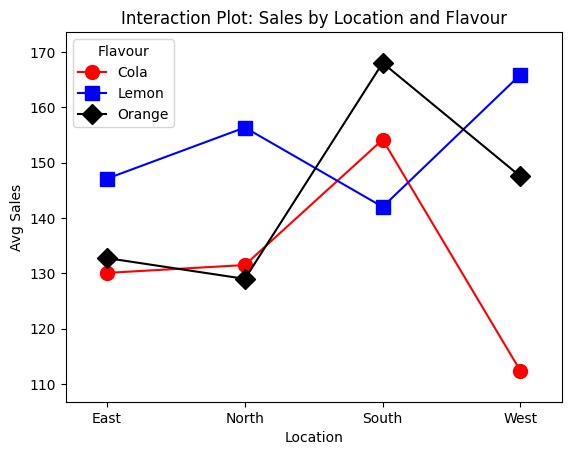

In [12]:
from statsmodels.graphics.factorplots import interaction_plot

#ms = marker size
fig = interaction_plot(df.Location, df.Flavour, df.Sales, colors=['red','blue', 'black'], markers=['o', 's', 'D'], ms=10)

# Add axis labels and a title
plt.xlabel("Location")
plt.ylabel("Avg Sales")
plt.title("Interaction Plot: Sales by Location and Flavour")

# Show the plot
plt.show()

In [ ]:
#Quiz 1
#p value < alpha

In [ ]:
#KS Test :  Kolmogorov-Smirnov test

In [18]:
from scipy import stats

H0 : The distribution of sample 1 is the same as the distribution of sample 2.

H1 : The distribution of sample 1 is different from the distribution of sample 2.

In [ ]:
#Kolgomorov distribition

In [13]:
# recovery times of patients who took medicine-1
r1 = [8.82420842, 7.47774471, 7.55712098, 7.98131439, 6.82771606,
       7.48566433, 9.15385732, 5.84040502, 8.26124313, 8.4728876 ,
       6.82582186, 7.00490974, 8.43423058, 6.72099932, 6.97495982,
       5.93748053, 5.40707847, 6.16385557, 6.71421056, 4.42396183,
       6.87285228, 8.00313581, 6.69035041, 7.83622942, 8.70984957,
       5.56284584, 9.08093437, 4.98165193, 7.67769408, 6.04738478,
       7.64921582, 7.31051639, 6.74463303, 7.27356973, 8.16787232,
       6.90990965, 7.06439167, 6.62921957, 6.08283539, 6.2458137 ,
       8.65173634, 5.76080646, 6.20573219, 8.91561004, 6.22560201,
       5.67542104, 6.97412435, 8.31354697, 8.14172701, 8.26099345,
       7.87612791, 6.24835109, 9.95324783, 6.59504627, 6.17365145,
       6.05676895, 7.23030223, 7.71311809, 7.37163804, 5.69798738,
       5.71056902, 7.94556876, 7.47234105, 6.85346234, 4.77892053,
       6.92631063, 6.10681151, 7.06277198, 7.18023164, 7.78285327,
       7.85500885, 6.54349161, 8.25949958, 6.44289198, 7.16705977,
       6.03517015, 7.61274786, 7.032845  , 6.78161745, 7.07917968,
       6.21549342, 5.34267439, 6.73039933, 7.70562561, 8.15117049,
       6.72564324, 6.68220904, 8.50359274, 7.52912703, 7.34572493,
       5.95734283, 6.58259396, 6.49394335, 8.68069592, 8.60547125,
       6.8905056 , 7.72575925, 6.84801609, 7.96999724, 7.10420915]

In [14]:
# recovery times of patietnts who took medicine-2
r2 = [ 9.56597358,  7.49291458,  8.73841824,  7.63523452,  4.12559277,
        7.3679259 ,  9.87873565,  6.14516559,  8.19923821,  7.30169992,
       10.24606417,  6.83814477,  7.01611267,  6.15716049,  8.29590714,
       12.3333305 ,  8.22144016,  6.06830071,  3.75820649,  6.69220157,
       10.08721618,  9.70580422,  7.31050006, 11.40145721,  5.64818498,
        7.38914449,  8.43740074,  6.3451435 ,  7.05694361,  8.1997151 ,
        9.03059061,  7.76904679,  6.92375578,  5.78318543,  8.99027781,
        7.56186529,  5.27095372,  8.32896688, 11.52935757,  7.08119961,
        9.48825066,  9.14072759,  7.30357663,  8.62183754, 10.40999814,
        8.70096763,  7.04645384,  6.378799  , 10.5098363 ,  7.36078888,
        7.33403615,  8.07396248,  6.18309499,  7.24668404,  9.03430611,
        8.99016584,  6.78606416,  8.436418  ,  6.85877947, 10.10405772,
        6.74943076,  7.57812376,  7.12920671,  9.38065269,  9.57139966,
        6.4484012 ,  6.93877043,  9.22141667,  8.34815638,  7.73980671,
        7.17840767,  9.27913457,  6.49963224,  9.92287292,  7.63978639,
        9.53931977,  9.02602273,  6.79374185,  8.59715131,  8.37747338,
        8.78161815,  6.78716383,  8.28473394,  8.20283798, 12.50518811,
       10.19772574,  8.93758457,  8.9540311 ,  8.28927558,  6.28935098,
        7.69447559,  9.66777701, 10.33898342,  8.71199578,  5.12781581,
        9.70954569,  9.13685031,  7.28989718,  8.0868909 ,  7.42937556,
        7.31356749,  9.92345816,  8.60211814,  9.33228465,  8.14132658,
        6.17871495, 10.28358242,  7.31898597,  7.95085527,  6.20331719,
        9.19119762,  6.98600628,  7.05314883, 10.57921482,  6.83637574,
        7.86199283,  8.23350975,  5.87625665,  7.78945364,  8.83612492]

In [15]:
d1 = np.array(r1)
d2 = np.array(r2)
n1 = len(d1)
n2 = len(d2)
n1, n2

(100, 120)

In [19]:
statistic, p_value =  stats.kstest(d1, d2)
print("KS Statistic:", statistic)
print("P-value:", p_value)

KS Statistic: 0.3233333333333333
P-value: 1.516338798228849e-05


In [20]:
# Check if the p-value is greater than 0.01
if p_value > 0.01:
    print("The p-value is greater than 0.01,two samples have the same distribution.")
else:
    print("The p-value is less than or equal to 0.01, two samples have different distributions.")

The p-value is less than or equal to 0.01, two samples have different distributions.


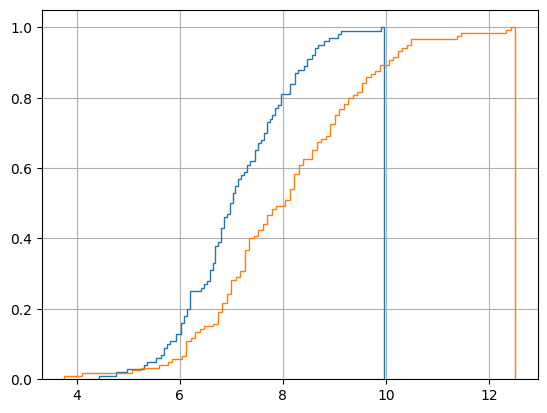

In [21]:
plt.grid()
a = plt.hist(d1, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
b = plt.hist(d2, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
plt.show()

In [ ]:
#Example where we have similar distributions

In [22]:
data1 = [ 4.96714153,  1.38264301,  6.47688538, 15.23029856,  2.34153375,
        2.34136957, 15.79212816,  7.67434729,  4.69474386,  5.42560044,
        4.63417693,  4.65729754,  2.41962272, 19.13280245, 17.24917833,
        5.62287529, 10.1283112 ,  3.14247333,  9.08024076, 14.12303701,
       14.65648769,  2.257763  ,  0.67528205, 14.24748186,  5.44382725,
        1.1092259 , 11.50993577,  3.75698018,  6.0063869 ,  2.9169375 ,
        6.01706612, 18.52278185,  0.13497225, 10.57710929,  8.22544912,
       12.2084365 ,  2.08863595, 19.59670124, 13.28186049,  1.96861236,
        7.3846658 ,  1.71368281,  1.15648282,  3.01103696, 14.7852199 ,
        7.19844208,  4.60638771, 10.57122226,  3.4361829 , 17.63040155,
        3.24083969,  3.8508228 ,  6.76922   ,  6.11676289, 10.30999522,
        9.31280119,  8.39217523,  3.09212376,  3.31263431,  9.75545127,
        4.79174238,  1.85658977, 11.06334974, 11.96206624,  8.12525822,
       13.56240029,  0.72010122, 10.03532898,  3.61636025,  6.45119755,
        3.61395606, 15.38036566,  0.35826039, 15.64643656, 26.19745104,
        8.21902504,  0.87047068,  2.9900735 ,  0.91760777, 19.87568915,
        2.19671888,  3.57112572, 14.77894045,  5.18270218,  8.08493603,
        5.01757044,  9.15402118,  3.2875111 ,  5.29760204,  5.13267433,
        0.97077549,  9.68644991,  7.02053094,  3.27662147,  3.92108153,
       14.63514948,  2.96120277,  2.61055272,  0.05113457,  2.34587133]

In [23]:
data2 = [14.15370742,  4.20645323,  3.42714517,  8.02277269,  1.61285712,
        4.04050857, 18.86185901,  1.74577813,  2.57550391,  0.74445916,
       19.18771215,  0.26513875,  0.6023021 , 24.63242112,  1.92360965,
        3.01547342,  0.3471177 , 11.68678038, 11.42822815,  7.51933033,
        7.91031947,  9.09387455, 14.02794311, 14.01851063,  5.86857094,
       21.90455626,  9.90536325,  5.6629773 ,  0.99651365,  5.03475654,
       15.50663431,  0.68562975, 10.62303714,  4.73592431,  9.19424234,
       15.49934405,  7.83253292,  3.22061516,  8.13517217, 12.30864316,
        2.27459935, 13.07142754, 16.07483235,  1.84633859,  2.59882794,
        7.81822872, 12.36950711, 13.20456613,  5.21941566,  2.96984673,
        2.5049285 ,  3.46448209,  6.80024722,  2.32253697,  2.93072473,
        7.14351418, 18.65774511,  4.73832921, 11.91303497,  6.56553609,
        9.7468167 ,  7.87084604, 11.58595579,  8.20682318,  9.63376129,
        4.12780927,  8.2206016 , 18.96792983,  2.45388116,  7.53736164,
        8.8951443 ,  8.15810285,  0.77101709,  3.41151975,  2.76690799,
        8.27183249,  0.13001892, 14.53534077,  2.64656833, 27.20169167,
        6.25667348,  8.57157556, 10.70892498,  4.82472415,  2.23462785,
        7.14000494,  4.73237625,  0.72828913,  8.46793718, 15.14847225,
        4.46514952,  8.56398794,  2.14093744, 12.45738779,  1.73180926,
        3.8531738 ,  8.83857436,  1.53725106,  0.58208718, 11.42970298,
        3.5778736 ,  5.60784526, 10.83051243, 10.53802052, 13.77669368,
        9.3782504 ,  5.15035267,  5.13785951,  5.15047686, 38.52731491,
        5.70890511, 11.3556564 ,  9.54001763,  6.51391251,  3.15269245,
        7.5896922 ,  7.72825215,  2.36818607,  4.85363548,  0.81874139]

In [24]:
data1 = np.array(data1)
data2 = np.array(data2)
n1 = len(data1)
n2 = len(data2)
n1, n2

(100, 120)

In [25]:
statistic, p_value =  stats.kstest(data1, data2)
print("KS Statistic:", statistic)
print("P-value:", p_value)

KS Statistic: 0.095
P-value: 0.671374753605883


In [26]:
# Check if the p-value is greater than 0.01
if p_value > 0.01:
    print("The p-value is greater than 0.01,two samples have the same distribution.")
else:
    print("The p-value is less than or equal to 0.01, two samples have different distributions.")

The p-value is greater than 0.01,two samples have the same distribution.


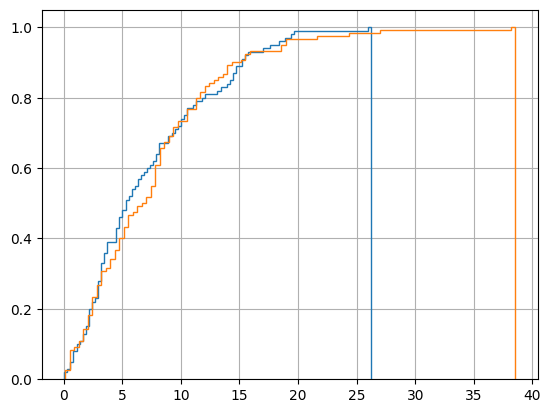

In [27]:
plt.grid()
a = plt.hist(data1, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
b = plt.hist(data2, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
plt.show()

In [ ]:
#A/B Testing

In [ ]:
#Youtube : 2ads per ad break or should they stick with 1 ad per ad break

In [ ]:
#H0 : Mean Watch Time of Users given 2 ads = Mean Watch Time of Users given 1 ad per ad break
#H1 : Mean Watch Time of Users given 2 ads <> Mean Watch Time of Users given 1 ad per ad break

In [28]:
import seaborn as sns
from scipy import stats

In [29]:
!gdown 1CS513bBqabMfrUhVcqm_nhlgrQheMNZ1

Downloading...
From: https://drive.google.com/uc?id=1CS513bBqabMfrUhVcqm_nhlgrQheMNZ1
To: /content/ab_test_data.csv
100% 884k/884k [00:00<00:00, 117MB/s]


In [ ]:
#!wget --no-check-certificate https://drive.google.com/uc?id=1CS513bBqabMfrUhVcqm_nhlgrQheMNZ1 -O ab_test_data.csv

In [30]:
ab_test_data = pd.read_csv("ab_test_data.csv")

ab_test_data.head(10)

,date,customer_id,premium,watch_time_hrs,customer_segmnt
0,2018-09-11,402,0,7.173618,control
1,2018-02-28,227,0,0.836170,control
2,2018-10-18,812,1,4.402078,treatment
3,2018-05-22,43,0,3.982454,control
4,2018-07-18,307,0,7.513302,control
5,2018-09-10,238,0,1.456961,control
6,2018-02-21,691,1,3.800375,treatment
7,2018-04-27,199,0,4.574446,control
8,2018-05-28,105,0,3.425942,control
9,2018-09-24,604,0,3.959896,treatment


In [31]:
sum((ab_test_data["premium"] == 0) & (ab_test_data["customer_segmnt"] == "control"))

8459

In [32]:
sum((ab_test_data["premium"] == 1) & (ab_test_data["customer_segmnt"] == "treatment"))

2012

In [33]:
sum((ab_test_data["premium"] == 1) & (ab_test_data["customer_segmnt"] == "control"))

1514

In [34]:
sum((ab_test_data["premium"] == 0) & (ab_test_data["customer_segmnt"] == "treatment"))

7975

In [ ]:
ab_test_data.shape

(19960, 5)

In [35]:
ab_test_data['customer_segmnt'].value_counts()

,count
customer_segmnt,
treatment,9987
control,9973


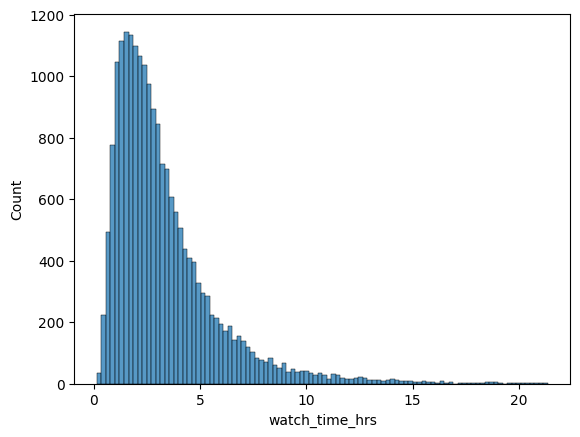

In [36]:
sns.histplot(ab_test_data['watch_time_hrs'], bins=100)
plt.show()

In [37]:
ab_test_data.groupby("customer_segmnt")["watch_time_hrs"].mean()

,watch_time_hrs
customer_segmnt,
control,3.609960
treatment,3.054294


In [38]:
ab_test_control_data = ab_test_data[ab_test_data["customer_segmnt"] == "control"]
ab_test_treatment_data = ab_test_data[ab_test_data["customer_segmnt"] == "treatment"]

In [39]:
ab_test_control_data["watch_time_hrs"].mean() - ab_test_treatment_data["watch_time_hrs"].mean()

np.float64(0.555666548844524)

In [40]:
from scipy.stats import ttest_ind
statistic, p_value = stats.ttest_ind(ab_test_control_data["watch_time_hrs"], ab_test_treatment_data["watch_time_hrs"])
print("Test Statistic:", statistic)
print("P-value:", p_value)

Test Statistic: 15.96034913022092
P-value: 5.438408586231319e-57


In [ ]:
#Parametric vs Non-Parametric Test

In [41]:
#1 Z Test - Parametric
#2 Sample T Test - P
#1 Sample Z test prop - P
#1 Way Anova - P
#Two Sample Z test - P
#Paired T Test - P
#2 Sample Z test prop - P
#Chi Sq - NP
#Two way Anova - P
#Shapiro Wilk - P
#Levene - P
#KS Test - NP
#A/B Test - P/NP
#Kruskal - NP